<img width="400" src="https://nomeroff.net.ua/images/logo/nomeroff_net.svg" alt="Nomeroff Net. Automatic numberplate recognition system" align="left"/>

## The example demonstrates license plate number detection and recognition.

In [1]:
import os
import sys
import glob
import matplotlib.pyplot as plt

current_dir = os.path.dirname("./")
nomeroff_net_dir = os.path.join(current_dir, "../../../")
sys.path.append(nomeroff_net_dir)

from nomeroff_net import pipeline
from nomeroff_net.tools import unzip


In [2]:
number_plate_detection_and_reading = pipeline("number_plate_detection_and_reading", image_loader="opencv")

/home/dmitro/.local/lib/python3.9/site-packages/torch/functional.py:507: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3549.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
/home/dmitro/.local/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/dmitro/.local/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_B2_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_B2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
/home/dmitro/.local/lib/pyt

In [3]:
result = number_plate_detection_and_reading(
    glob.glob(os.path.join(nomeroff_net_dir, './data/examples/oneline_images/*'))
)

/mnt/var/www/det_rec/nomeroff-net/tutorials/ju/inference/./../../../nomeroff_net/nnmodels/numberplate_options_model.py:136: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x1 = functional.softmax(x1)
/mnt/var/www/det_rec/nomeroff-net/tutorials/ju/inference/./../../../nomeroff_net/nnmodels/numberplate_options_model.py:137: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x2 = functional.softmax(x2)
/mnt/var/www/det_rec/nomeroff-net/tutorials/ju/inference/./../../../nomeroff_net/pipes/number_plate_text_readers/base/ocr.py:257: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:275.)
  pred_texts = decode_batch(torch.Tensor(net_out_value), self.

In [4]:
(images, images_bboxs, 
 images_points, images_zones, region_ids, 
 region_names, count_lines, 
 confidences, texts) = unzip(result)

['AC4921CB']


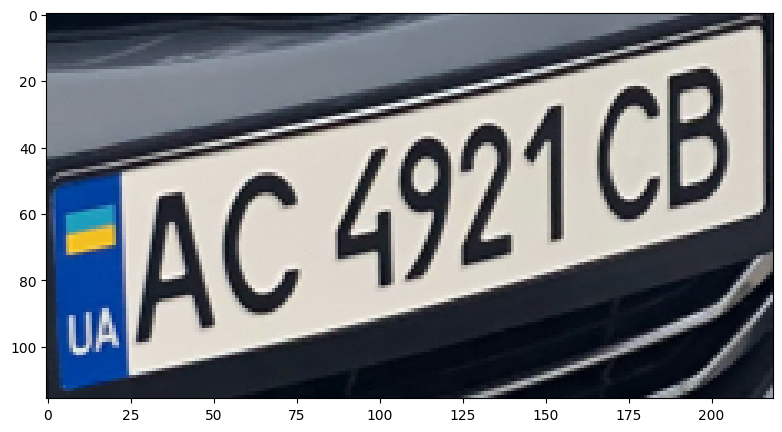

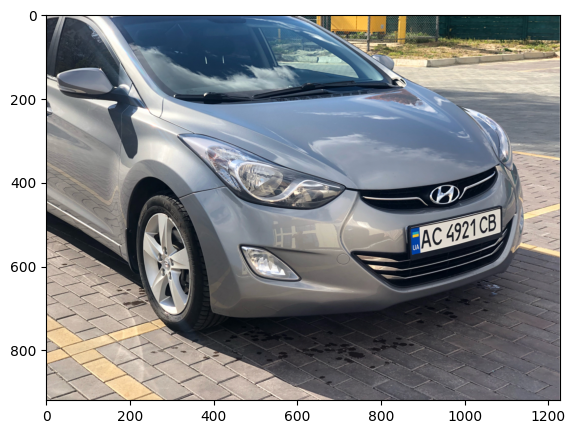

['AA8809TI']


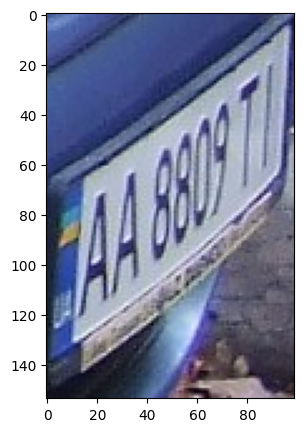

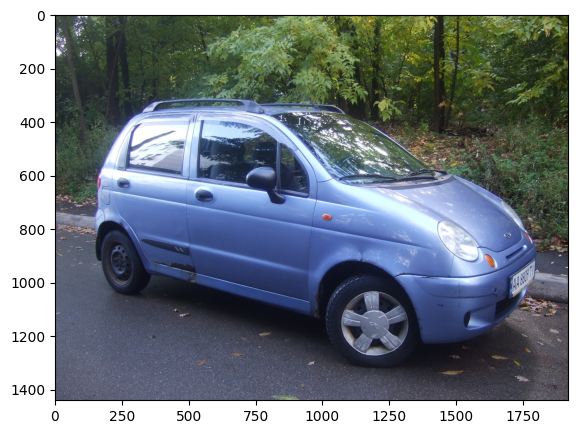

['E186AX777']


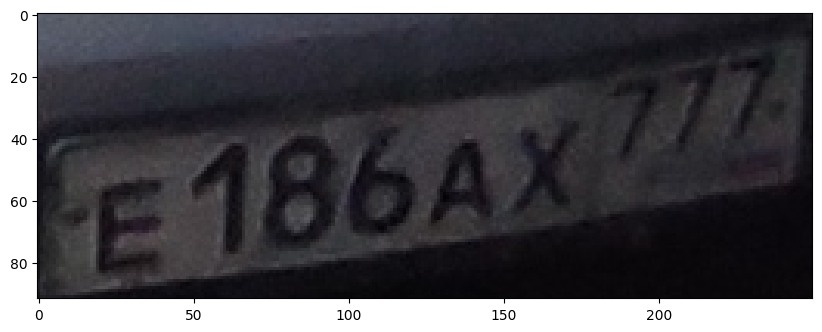

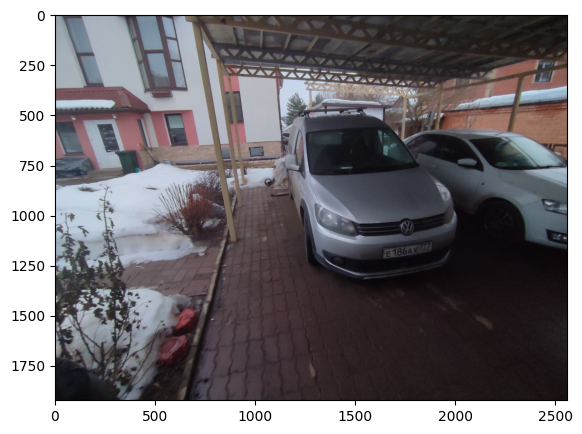

['RP70012', 'JJF509']


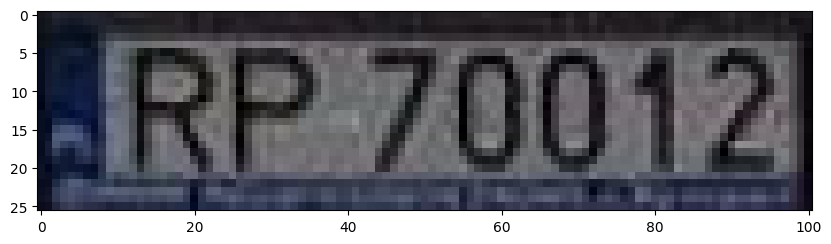

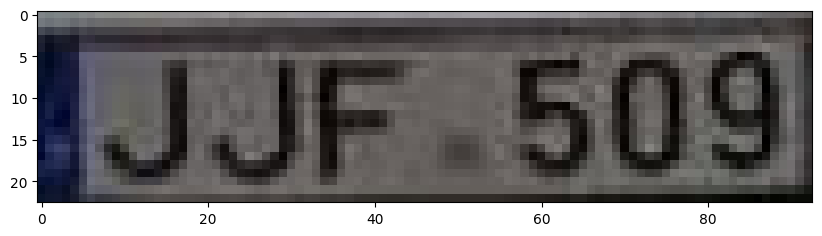

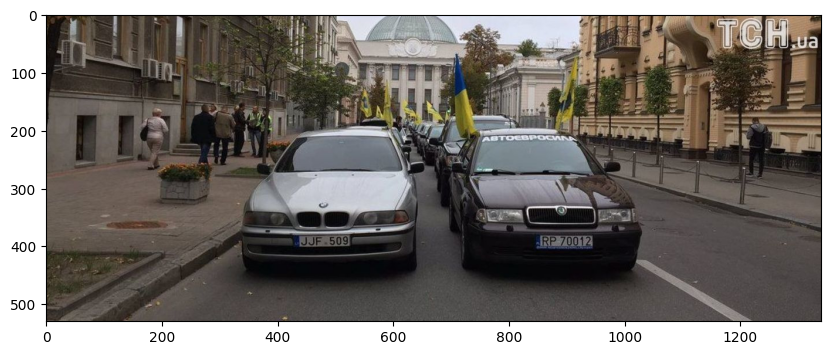

['В8233ХА', '86MM']


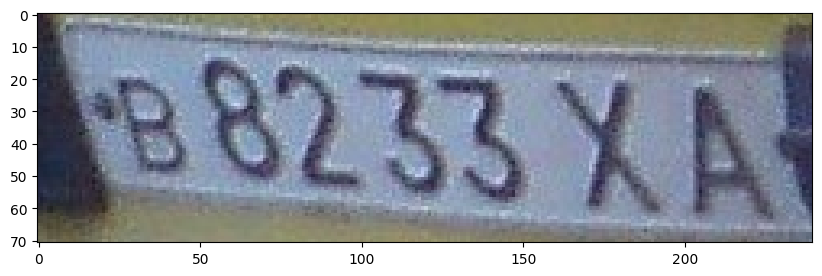

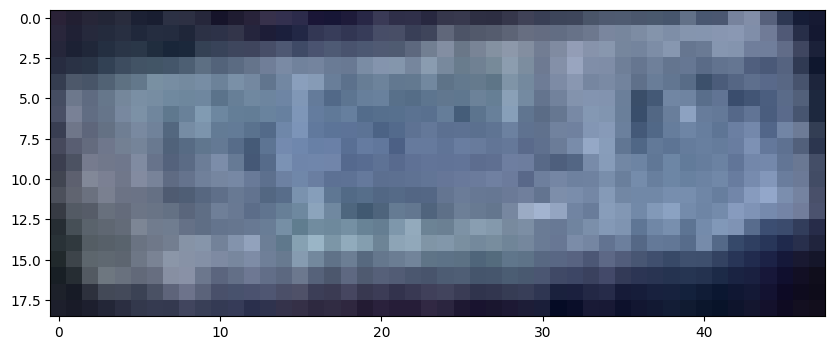

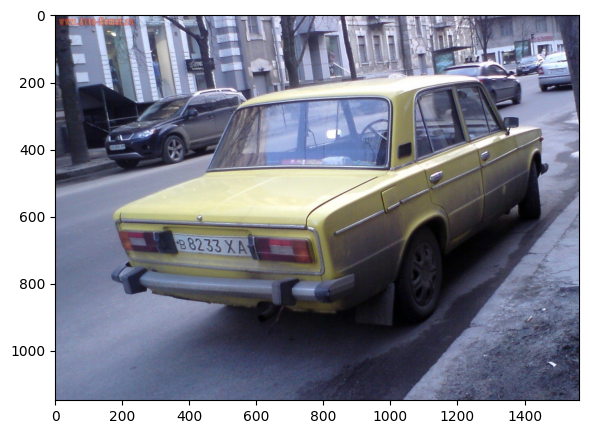

['M556BX159']


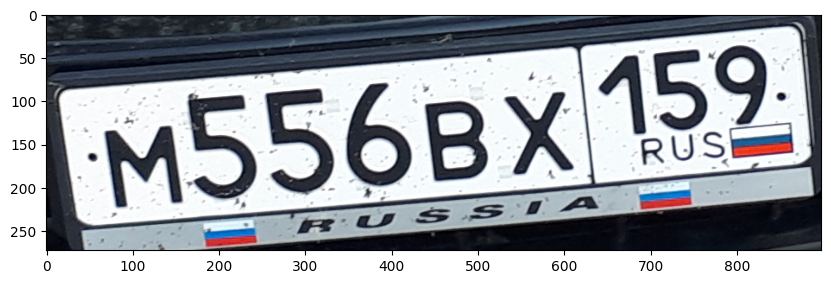

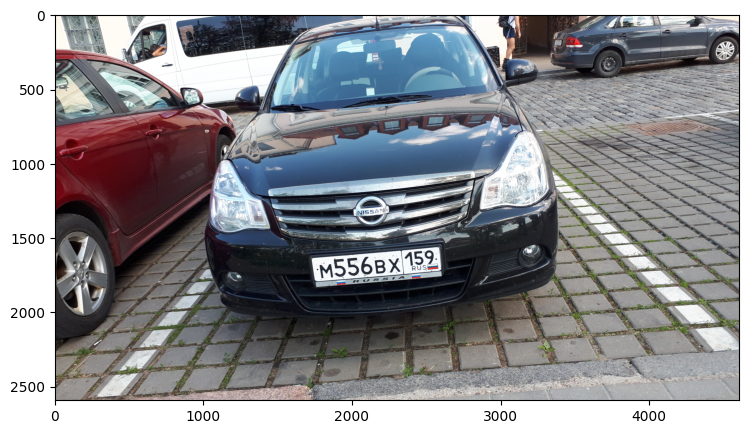

['49940PB']


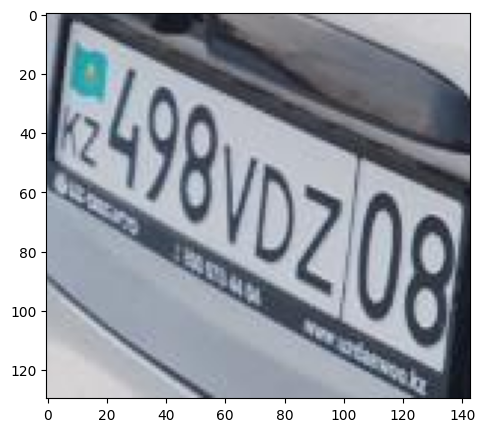

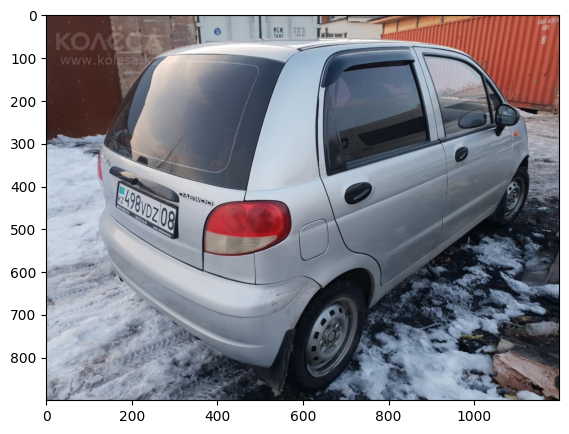

['00964GG', 'AA2EE']


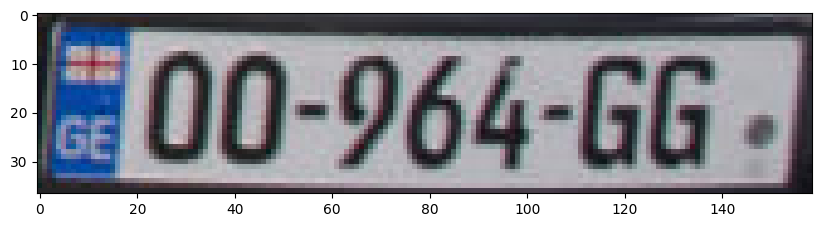

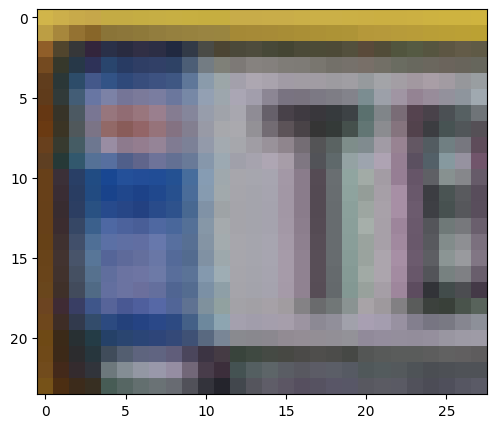

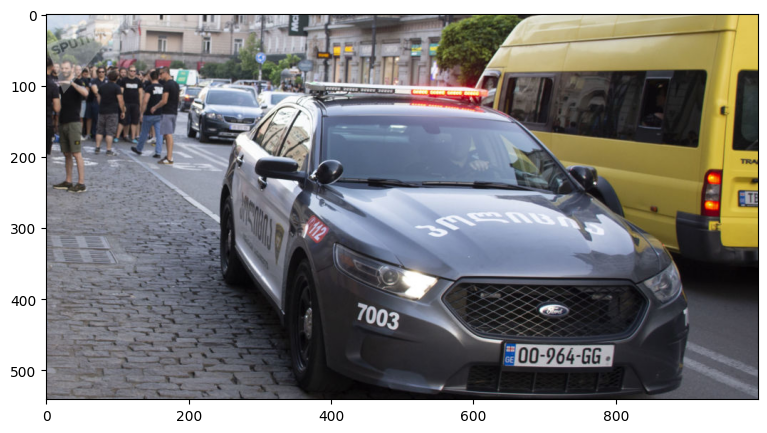

In [5]:
%matplotlib inline
plt.rcParams["figure.figsize"] = (10,5)

for img, zones, np in zip(images, images_zones, texts):
    print(np)
    for zone in zones:
        plt.imshow(zone)
        plt.show()
    plt.imshow(img)
    plt.show()